# Neural Networks with Keras

First things first, I'm a realist...

I added instructions to install Tensorflow and Keras (it doesn't come pre-packaged with Anaconda). I'm assuming some have yet to do that, and these packages take time to install.

Try to run the code block below. If it gives an error that Tensorflow or Keras aren't found, you'll need to install those packages. Uncomment the first line in the code block below and run it again.

While that's happening, we'll go over some background and vocabulary relating to neural networks.

In [1]:
#!conda install tensorflow keras

from keras.datasets import fashion_mnist
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

ModuleNotFoundError: No module named 'tensorflow'

## What are Neural Networks?

Neural networks are machine learning models (loosely) inspired by the structure of the human brain. Neural networks can be implemented for regression and classification tasks and are widely used in complex tasks such as image and speech processing, language translation, time-series modeling and forecasting, and anomaly detection. There are numerous variants of neural networks. Some notable examples:

 - Multi-layer Percpetron (MLP) - the vanilla neural network we'll use today
 - Convolutional Neural Network (CNN) - are largely used in image and video processing, but can also be applied to time-series and forecasting problems
 - Recurrent Neural Network (RNN) - used for time-series modeling and forecasting
 - Long- Short-Term Memory Neural Network (LSTM) - an upgrade of RNN. This was the cutting edge of natural language processing before transformers (as in Generative Pre-trained Transformer) ushered in the age of LMMs.
 - Generative Adversarial Networks (GANs) - used for generating novel data (i.e. a genAI model) and fraud detection. GANs comprise parallel neural networks, a generator (creating fake instances of data) and discriminator (trained to detect real data from fake).

 ## Why Neural Networks over other models? The PROs.

 - Ability to model complex nonlinear relationships: Neural networks can automatically learn and represent intricate, nonlinear patterns between inputs and outputs, which many traditional models (like linear regression) cannot do without extensive manual feature engineering.
 - Handling of high-dimensional and unstructured data: NNs excel at processing large-scale, high-dimensional data (e.g. images, audio, and text) where other models often struggle.
 - Feature extraction and automatic feature engineering: NNs 'discover' and construct relevant features from raw data, reducing the need for manual intervention and domain expertise in feature selection.
 - Adaptability in deployment: NNs adapt to new data and improve performance over time, making them suitable for dynamic, real-world applications.

 ## Why not Neural Networks? The CONs.

 - Require large amounts of data: NNs have many many parameters, so they typically need thousands to millions of labeled examples to perform well. For smaller data sets, other ML models are more suitable.
 - Lack interpretability (“black box”): For most NNs (especially deep NNs), we cannot gleen meaning from the parameters.
 - High computational cost: Training neural networks, especially deep NNs, demands significant computational resources (powerful GPUs/TPUs) and can take much longer than training traditional models. Many such models are trained on remote cloud computing servers (pay per compute).
 - Risk of overfitting: Neural networks, with their large number of parameters, are prone to overfitting if not properly regularized, especially when trained on small or noisy datasets.
 - Complexity in development and tuning: Designing, training, and tuning neural networks (e.g., choosing architecture, hyperparameters) is often more complex and time-consuming than working with traditional models, which generally have fewer parameters and simpler structures.

 ## Neural Network Anatomy and The Multi-Layer Perceptron

The term *perceptron* has two common usages: a single artificial neuron or several artificial neurons arranged in a single layer. Either way, a perceptron is a sort of building block for more complex neural networks.

First, let's consider the single 'neuron' interpretation.

![perceptron, by Adam Weaver](../images/perceptron.png)

In the diagram above, each input feature is assigned a weight (parameters) and a weighted sum of features and a bias term are fed through some non-linear activation function. The diagram above can be represented by the following equation:

$$
\hat{y} = f(b + w_0 \cdot x_0 + w_1 \cdot x_1+ w_2 \cdot x_2 + w_3 \cdot x_3)
$$

### Activation Functions

Every perceptron that comprises a neural network has some activation function. Activiation functions are non-linear and without them, a neural network (regardless of size) could be reduced to a single linear neuron. These activation functions make it that for any given region of the feature space, only some neurons will participate and others will be dormant. So the feature space is parsed by different subsets of neurons.

Some example activation functions are:

 - Heaviside function - step function
 - Sigmoid function - same as logit function from logistic regression
 - Rectifying Linear Unit (ReLu) - linear for positive values and zero otherwise. This is the most common activation function.
 - Tanh - hyperbolic tangent function, similar to sigmoid but ranges -1 to 1.

### Multi-Layer Perceptron (the vanilla NN)

![MLP, Kishgore NG](../images/MLP.jpeg)

A MLP comprises layers of perceptrons and each layer may itself contain numerous perceptrons. In this diagram, every neuron in one layer projects onto every neuron in the subsequent layer. These are called *dense* layers.

Generally, in densely connected NNs, each perceptron in a layer is the same (same number of parameters and same activation function).

Glossary:

 - Input layer - This layer accepts the features
 - Hidden layer - layers of perceptrons between input and output. *Deep* Neural Networks refer to NNs with many hidden layers. In the past, 'many' meant more than 3, but today, we have NNs with hundreds or thousands of layers. Deep is subjective and changes as technology improves.
 - Output layer - the layer where predictions are made
  - For regression, the output layer will have a single neuron for each predicted value (often one)
  - For binary classification, the output layer may have one or two neurons.
  - For multi-class classification, the output layer will have as many neurons as there are classes.

### Architecture and Hyper-parameters

When we first create the MLP, we have to decide on the architecture (how many layers, how many neurons per layer, activation functions, etc) and the hyper-parameters (regularization, batch size, epochs).

We haven't had to worry about training time and computational demands with the models we've used thus far, but NN's complexity make these issues non-trivial.

In fitting, we can adjust two hyper-parameters that govern learning: learning rate, batch size, and number of epochs.

 - *Learning Rate* - determines how much the parameters are adjusted at each update
 - *Batch* - a subset of the training data. The training data set is partitioned into batches and the parameters are updated after each batch is processed.
 - *Epoch* - Once through the entire training data. The training algorithm iterates through the entire training data set numerous times, each is an epoch.


| Batch Size | Training Speed | Memory Usage | Generalization |
|-|-|-|-|
| Large | Faster | Higher | Risk of Overfitting |
| Small | Slower | Lower | Regularized |

*Rule of thumb*: If we increase batch size, we should also increase learning rate.

In [2]:
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

import matplotlib.pyplot as plt


## Example: Fashion-MNIST, classifying articles of clothing

The [Fashion-MNIST datase](https://keras.io/api/datasets/fashion_mnist/) comprises 60,000 28x28 pixel, gray-scale images of clothing items from one of the following categories.

- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [3]:
x_train.shape

(60000, 28, 28)

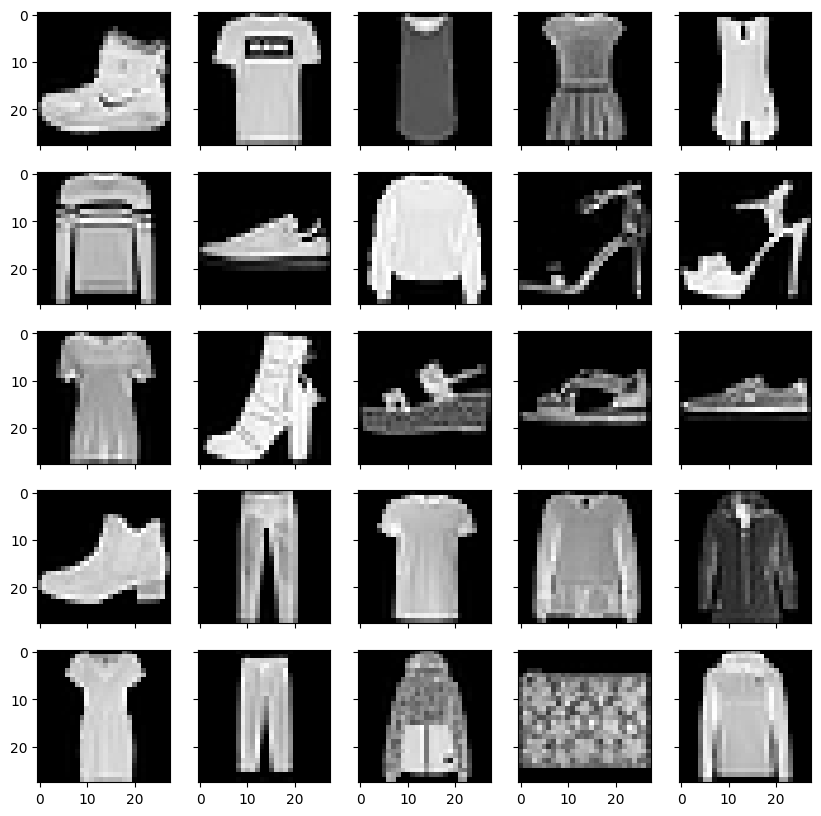

In [4]:
num_samples = 25
fig, ax = plt.subplots(5, 5, figsize = (10, 10), sharex = True, sharey= True)

for k in range(num_samples):
    i,j = int(k/5), k%5
    ax[i,j].imshow(x_train[k,:,:]/255, cmap = 'gray')
plt.show()

In [5]:

# Normalize the data, pixel data is 0-255 (8-bit) but we want 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create a vanilla neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


/Users/eatai/.pyenv/versions/3.9.21/envs/tf/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.7774 - loss: 0.6532 - val_accuracy: 0.8539 - val_loss: 0.4093
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8549 - loss: 0.3994 - val_accuracy: 0.8600 - val_loss: 0.3899
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.8717 - loss: 0.3561 - val_accuracy: 0.8649 - val_loss: 0.3867
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.8794 - loss: 0.3300 - val_accuracy: 0.8543 - val_loss: 0.4059
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.8879 - loss: 0.3105 - val_accuracy: 0.8782 - val_loss: 0.3452
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8924 - loss: 0.2907 - val_accuracy: 0.8779 - val_loss: 0.3378
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.8982 - loss: 0.2765 - val_accuracy: 0.8790 - val_loss: 0.3383
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.9037 - loss: 0.25

In [6]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [7]:
model.layers[1].get_weights()

[array([[ 0.08085855, -0.14814568,  0.18496941, ..., -0.03571397,
          0.14976683,  0.08547304],
        [-0.06087153, -0.02746509,  0.06837885, ..., -0.04750165,
          0.04113872, -0.04776509],
        [ 0.0804701 , -0.1635437 , -0.10509501, ..., -0.0335681 ,
          0.00870658, -0.05980233],
        ...,
        [-0.03822389, -0.28198832, -0.10777265, ..., -0.03772296,
          0.34806684, -0.14317346],
        [ 0.0399313 ,  0.04380609,  0.06157512, ..., -0.00806582,
          0.1335292 , -0.11953935],
        [ 0.03953132, -0.04701754,  0.25541812, ..., -0.1814157 ,
          0.09321535,  0.08979132]], dtype=float32),
 array([ 0.09647798, -0.01329397,  0.43153292,  0.3257448 , -0.11157256,
         0.33067507,  0.39455765,  0.40837643,  0.17961682,  0.5299815 ,
         0.24645121,  0.35475254, -0.01342771,  0.20736578,  0.18981878,
         0.05769858,  0.38150322,  0.15325998,  0.28265432, -0.27716854,
         0.5172499 ,  0.07852908, -0.01364137,  0.01035407, -0.012

In [8]:

weights = model.layers[1].get_weights()[0]
biases = model.layers[1].get_weights()[1]

print(weights.shape)
print(biases.shape)


(784, 128)
(128,)


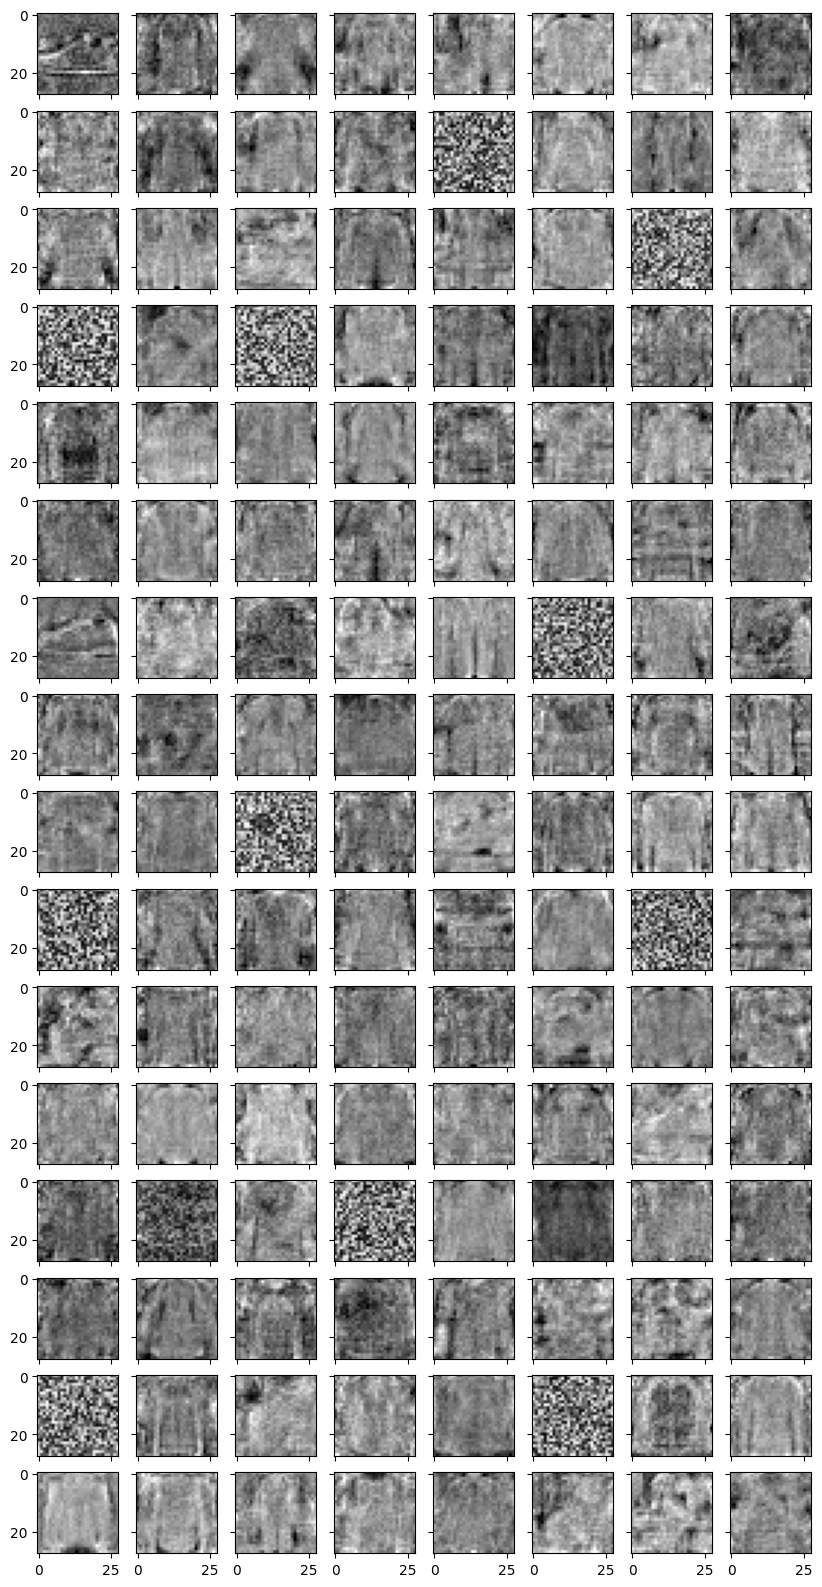

In [9]:
fig, ax = plt.subplots(16, 8, figsize = (10, 20), sharex = True, sharey= True)

for k, weight in enumerate(weights.transpose()):
    i,j = int(k/8), k%8
    ax[i,j].imshow(weight.reshape(28,28), cmap = 'gray')

In [10]:
# Evaluate the model on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)
y_train_pred = np.argmax(model.predict(x_train), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step


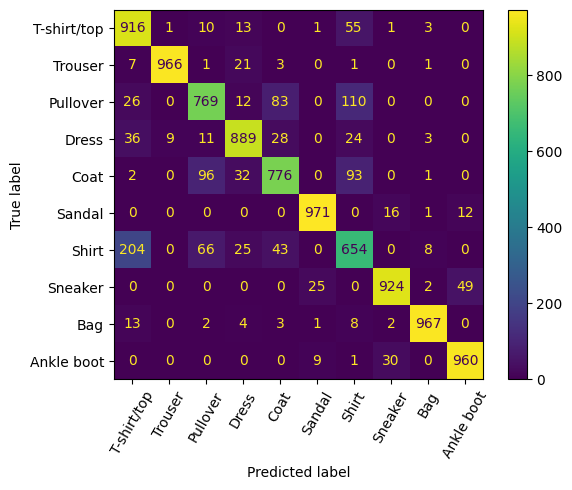

In [11]:


labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels = labels).plot()

plt.xticks(rotation = 60)
plt.show()

In [12]:
print('TRAINING REPORT:')
print(classification_report(y_train, y_train_pred))

print('TESTING REPORT:')
print(classification_report(y_test, y_pred))

TRAINING REPORT:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      6000
           1       0.99      0.98      0.99      6000
           2       0.87      0.81      0.84      6000
           3       0.92      0.93      0.92      6000
           4       0.87      0.81      0.84      6000
           5       0.98      0.99      0.98      6000
           6       0.76      0.72      0.74      6000
           7       0.98      0.94      0.96      6000
           8       0.99      0.98      0.99      6000
           9       0.96      0.98      0.97      6000

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000

TESTING REPORT:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.77      0.79  